In [1]:
# CONECTAR CON DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os
import sys
path ='/content/drive/MyDrive/cod/LEA3_Marketing'
os.chdir(path) ## volver la carpeta de repositorio directorio de trabajo
sys.path.append(path) ## agregarla al path, para leer archivos propios como paquetes

In [ ]:
#!pip install mlxtend

In [1]:
# LIBRERIAS
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.graph_objs as go ### para gráficos
import plotly.express as px
import a_funciones as fn
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql ### paquete para crear y trabajar bases de datos ligeras

In [2]:
# CREAR CONEXIÓN CON LA BASE DE DATOS db_movies
con = sql.connect('data/db_movies')

# CREAR EL CURSOR
cur = con.cursor() ## se crea el cursor, que es el otro tipo de conexión para ejecutar las consultas

In [3]:
# VERIFICAR LOS NOMBRES DE TODAS LAS TABLAS QUE HAY EN LA BASE DE DATOS
cur.execute(""" select name from sqlite_master where type= 'table'  """)
cur.fetchall()

[('ratings',), ('movies',), ('db_movies_final',)]

Se confirma la información del trabajo, y es que la empresa cuenta con una base de datos sql “bd_movies” en la cuál se encuentran **dos tablas**. Una tabla tiene la información del catálogo de películas disponibles en la plataforma llamada ‘movies’. Los campos que tiene esta tabla son:

*  **movieId**: código que identifica la película
*  **title**: Nombre y año de la película
*  **genres**: Lista de géneros a los que pertenece la película.  

La segunda tabla es una lista de los usuarios y las películas que vieron, las fechas en las que las vieron y la calificación que le dieron a la película. Los campos son:

* **userId**: Código que identifica al usuario.
* **movieId**: Código que identifica la película.
* **Rating**: Calificación de la película vista de 1 a 5.
* **Timestamp**: Timestamp de la fecha en la que fue vista la película.


# **TABLAS QUE CONTIENE LA BASE DE DATOS**

In [4]:
# VERIFICAMOS LA PRIMERA TABLA "raitings"
db_ratings = pd.read_sql('SELECT * FROM ratings', con)
db_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# VERIFICAMOS LA SEGUNDA TABLA "movies"
db_movies = pd.read_sql('SELECT * FROM movies', con)
db_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
db_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [7]:
db_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
db_movies.duplicated().sum()


0

In [9]:
db_movies[db_movies.duplicated()]


,movieId,title,genres


In [10]:
db_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## **Exploración inicial**

In [11]:
# Número de usuarios en la tabla ratings que han calificado peliculas
pd.read_sql("""SELECT COUNT(DISTINCT userId) AS total_usuarios FROM ratings""", con)

,total_usuarios
0,610


Se halla que hay un total de 610 usuarios dentro de la base de datos

In [ ]:
#Numero de peliculas en la tabla movies
pd.read_sql("""SELECT COUNT(DISTINCT movieId) AS total_peliculas FROM movies""", con)

,total_peliculas
0,9742


En total se tienen 9742 peliculas dentro de la base de datos

In [ ]:
db_ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Las peliculas van de un rango de 0-5 en intervalos de 0.5

In [ ]:
#Conteo de calificaciones
cr = pd.read_sql("""
    SELECT
        rating,
        COUNT(*) AS conteo
    FROM ratings
    GROUP BY rating
    ORDER BY rating ASC
""", con)

# Gráfico de barras
data = go.Bar(
    x=cr.rating,
    y=cr.conteo,
    text=cr.conteo,
    textposition="outside"
)

layout = go.Layout(
    title="Distribución de calificaciones de películas",
    xaxis={
        'title': 'Calificación',
        'type': 'category',  # Tratar cada valor como categoría
        'categoryorder': 'array',
        'categoryarray': cr.rating.tolist()  # Ordenar según tus datos
    },
    yaxis={'title': 'Cantidad'}
)

go.Figure(data=[data], layout=layout).show()

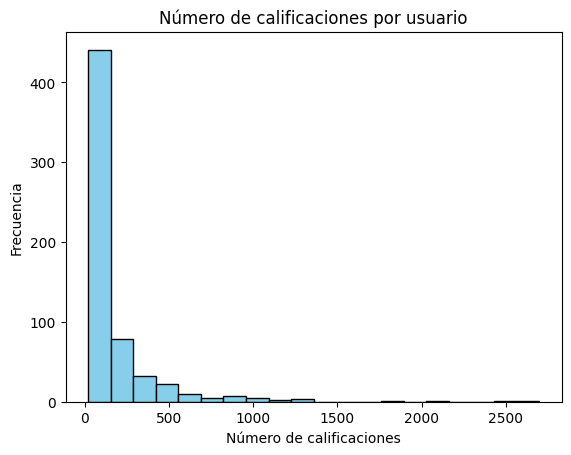

In [ ]:
# Obtener número de calificaciones por usuario
rating_users = pd.read_sql('''
    SELECT userId AS user_id,
           COUNT(*) AS cnt_rat
    FROM ratings
    GROUP BY userId
    ORDER BY cnt_rat ASC
''', con)

# Histograma del número de calificaciones por usuario
plt.hist(rating_users['cnt_rat'], bins=20, color='skyblue', edgecolor='black')
plt.title('Número de calificaciones por usuario')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Obtener número de calificaciones por usuario
rating_users = pd.read_sql('''
    SELECT userId AS user_id,
           COUNT(*) AS cnt_rat
    FROM ratings
    GROUP BY userId
''', con)

# Definir los rangos (bins más grandes: de 50 en 50)
bin_size = 100  # Tamaño del bin
max_val = rating_users['cnt_rat'].max()
bins = np.arange(0, max_val + bin_size, bin_size)
labels = [f"{b}-{b+bin_size-1}" for b in bins[:-1]]

# Agrupar en los bins
rating_users['bin'] = pd.cut(rating_users['cnt_rat'], bins=bins, labels=labels, right=False)

# Contar cuántos usuarios hay en cada rango
hist_data = rating_users['bin'].value_counts().sort_index()

# Crear gráfico de barras
data = go.Bar(
    x=hist_data.index.astype(str),
    y=hist_data.values,
    text=hist_data.values,
    textposition="outside",
    marker=dict(color='royalblue')
)

layout = go.Layout(
    title="Distribución del número de calificaciones por usuario",
    xaxis={'title': 'Rango de número de calificaciones'},
    yaxis={'title': 'Cantidad de usuarios'}
)

go.Figure(data=[data], layout=layout).show()

In [ ]:
rating_users

,user_id,cnt_rat,bin
0,1,232,200-299
1,2,29,0-99
2,3,39,0-99
3,4,216,200-299
4,5,44,0-99
...,...,...,...
605,606,1115,1100-1199
606,607,187,100-199
607,608,831,800-899
608,609,37,0-99


In [ ]:
rating_users.describe()

,user_id,cnt_rat
count,610.000000,610.000000
mean,305.500000,165.304918
std,176.236111,269.480584
min,1.000000,20.000000
25%,153.250000,35.000000
50%,305.500000,70.500000
75%,457.750000,168.000000
max,610.000000,2698.000000


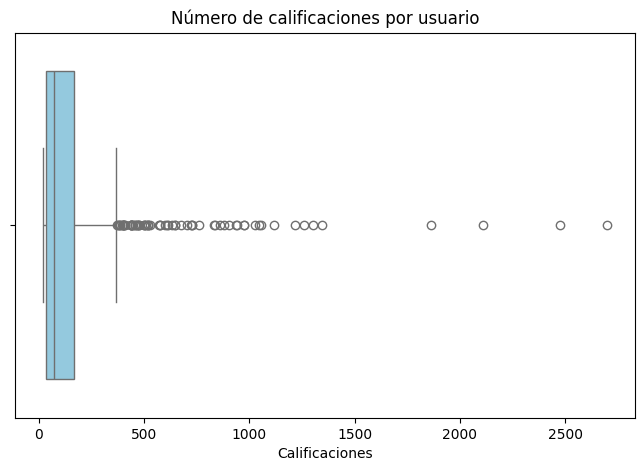

In [ ]:
# Boxplot número de peliculas calificadas por usuario
plt.figure(figsize=(8, 5))
sns.boxplot(x=rating_users['cnt_rat'], color='skyblue')
plt.title('Número de calificaciones por usuario')
plt.xlabel('Calificaciones')
plt.show()

In [ ]:
import plotly.graph_objects as go

# Boxplot con Plotly
fig = go.Figure()

fig.add_trace(go.Box(
    x=rating_users['cnt_rat'],
    name='',
    boxpoints='outliers',  # muestra los outliers
    marker=dict(color='skyblue'),
    line=dict(color='darkblue')
))

fig.update_layout(
    title="Número de calificaciones por usuario",
    xaxis_title="Calificaciones",
    yaxis_title="Distribución",
    showlegend=False
)

fig.show()

>La mayoria de usarios tiene pocas películas calificadas, pero los que mas tienen, son demasiadas, siendo un número improbable

>Excluir usuarios con menos de 20 películas calificadas (para tener calificación confiable) y los que tienen más de 300 porque ya no sería un valor razonable

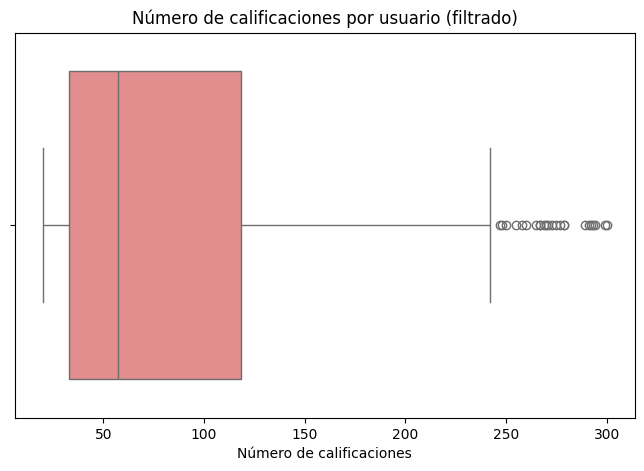

In [ ]:
# Filtrar usuarios con entre 5 y 500 calificaciones
rating_users2 = pd.read_sql('''
    SELECT userId AS user_id,
           COUNT(*) AS cnt_rat
    FROM ratings
    GROUP BY userId
    HAVING cnt_rat >= 20 AND cnt_rat <= 300
    ORDER BY cnt_rat ASC
''', con)

plt.figure(figsize=(8, 5))
sns.boxplot(x=rating_users2['cnt_rat'], color='lightcoral')
plt.title('Número de calificaciones por usuario (filtrado)')
plt.xlabel('Número de calificaciones')
plt.show()

In [ ]:

# Crear boxplot filtrado
fig = go.Figure()

fig.add_trace(go.Box(
    x=rating_users2['cnt_rat'],
    name='',
    boxpoints='outliers',  # muestra los outliers
    marker=dict(color='lightcoral'),
    line=dict(color='firebrick')
))

fig.update_layout(
    title="Número de calificaciones por usuario (filtrado)",
    xaxis_title="Número de calificaciones",
    yaxis_title="Distribución",
    showlegend=False
)

fig.show()

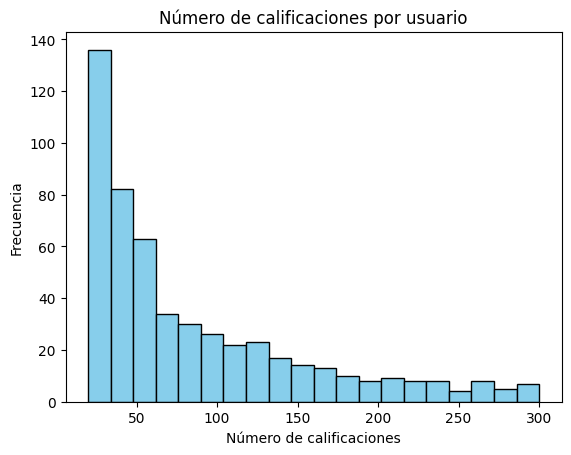

In [ ]:
# Histograma del número de calificaciones por usuario
plt.hist(rating_users2['cnt_rat'], bins=20, color='skyblue', edgecolor='black')
plt.title('Número de calificaciones por usuario')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Crear histograma con Plotly
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=rating_users2['cnt_rat'],
    nbinsx=20,  # Número de bins como en matplotlib
    marker=dict(color='skyblue', line=dict(color='black', width=1))
))

fig.update_layout(
    title="Número de calificaciones por usuario (filtrado)",
    xaxis_title="Número de calificaciones",
    yaxis_title="Frecuencia",
    bargap=0.1  # espacio entre barras
)

fig.show()

In [ ]:
# Descripción después de los filtros
rating_users2.describe()

,user_id,cnt_rat
count,527.000000,527.000000
mean,304.197343,85.079696
std,173.397977,68.833582
min,1.000000,20.000000
25%,154.500000,33.000000
50%,306.000000,57.000000
75%,451.500000,118.500000
max,609.000000,300.000000


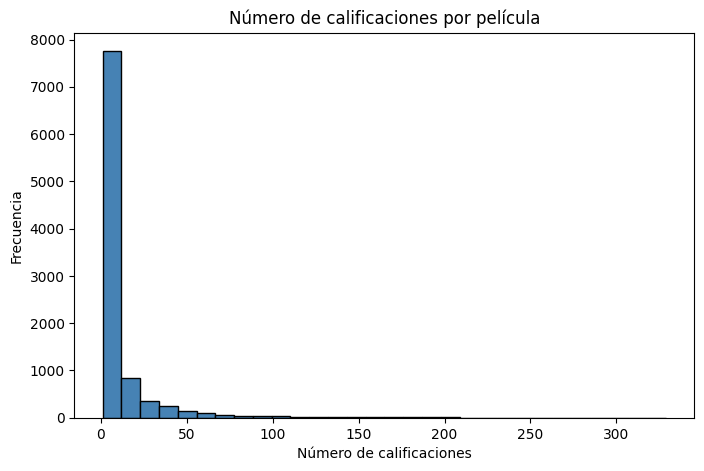

In [ ]:
# Verificar cuántas calificaciones tiene cada película
rating_movies = pd.read_sql('''
    SELECT movieId,
           COUNT(*) AS cnt_rat
    FROM ratings
    GROUP BY movieId
    ORDER BY cnt_rat DESC
''', con)


# Graficar distribución
plt.figure(figsize=(8, 5))
plt.hist(rating_movies['cnt_rat'], bins=30, color='steelblue', edgecolor='black')
plt.title('Número de calificaciones por película')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Crear histograma de calificaciones por película
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=rating_movies['cnt_rat'],
    nbinsx=30,  # Igual que matplotlib
    marker=dict(color='steelblue', line=dict(color='black', width=1))
))

fig.update_layout(
    title="Número de calificaciones por película",
    xaxis_title="Número de calificaciones",
    yaxis_title="Frecuencia",
    bargap=0.1
)

fig.show()

In [ ]:
# Distribución de calificaciones por película
rating_movies.describe()

,movieId,cnt_rat
count,9724.000000,9724.000000
mean,42245.024373,10.369807
std,52191.137320,22.401005
min,1.000000,1.000000
25%,3245.500000,1.000000
50%,7300.000000,3.000000
75%,76739.250000,9.000000
max,193609.000000,329.000000


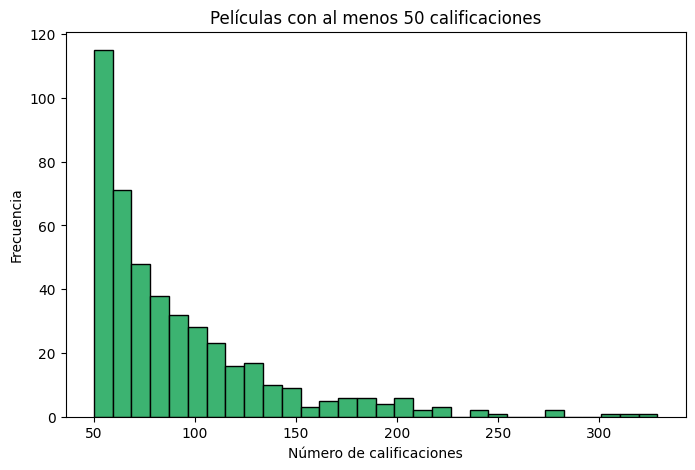

In [ ]:
####Excluir películas que no tengan más de 50 calificaciones
rating_movies2=pd.read_sql('''
SELECT movieId ,
        COUNT(*) as cnt_rat
FROM ratings
GROUP BY "movieId"
HAVING cnt_rat>=50
ORDER BY cnt_rat DESC
''',con )

plt.figure(figsize=(8, 5))
plt.hist(rating_movies2['cnt_rat'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Películas con al menos 50 calificaciones')
plt.xlabel('Número de calificaciones')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Crear histograma de calificaciones por película (filtrado)
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=rating_movies2['cnt_rat'],
    nbinsx=30,  # Igual que en matplotlib
    marker=dict(color='mediumseagreen', line=dict(color='black', width=1))
))

fig.update_layout(
    title="Películas con al menos 50 calificaciones",
    xaxis_title="Número de calificaciones",
    yaxis_title="Frecuencia",
    bargap=0.1
)

fig.show()

In [ ]:
rating_movies2.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,450.0,11245.017778,23457.084170,1.0,757.0,2020.0,4994.50,122904.0
cnt_rat,450.0,91.911111,46.098385,50.0,59.0,76.0,107.75,329.0


# PREPROCESAMIENTO

In [ ]:
from mlxtend.preprocessing import TransactionEncoder # Procesar datos en estructrura transaccional

genres=db_movies['genres'].str.split('|')
te = TransactionEncoder()
genres = te.fit_transform(genres)
genres = pd.DataFrame(genres, columns = te.columns_)

In [ ]:
df_sin_genres = db_movies.drop(columns='genres')

In [ ]:
db_movies_nuevo = pd.concat([df_sin_genres, genres], axis=1)

In [ ]:
db_movies_nuevo

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale (1995),False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II (1995),False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),False,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9738,193583,No Game No Life: Zero (2017),False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9739,193585,Flint (2017),False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9740,193587,Bungo Stray Dogs: Dead Apple (2018),False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
db_movies_nuevo[db_movies_nuevo['(no genres listed)'] == True]


,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8517,114335,La cravate (1957),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8684,122888,Ben-hur (2016),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8782,129250,Superfast! (2015),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8836,132084,Let It Be Me (1995),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8902,134861,Trevor Noah: African American (2013),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9033,141131,Guardians (2016),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9053,141866,Green Room (2015),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9070,142456,The Brand New Testament (2015),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9091,143410,Hyena Road,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
indices = db_movies_nuevo.index[db_movies_nuevo['(no genres listed)']].tolist()


In [ ]:
db_movies.loc[indices]

,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


In [ ]:
## consulta de peliculas que estan en la tabla movies, que no tienen calificacion alguna en la tabla ratings
df_delete = pd.read_sql(
    """SELECT * FROM movies
    LEFT JOIN ratings ON movies.movieId = ratings.movieId
    WHERE ratings.rating IS NULL""", con)

In [ ]:
df_delete

,movieId,title,genres,userId,movieId,rating,timestamp
0,1076,"Innocents, The (1961)",Drama|Horror|Thriller,None,None,None,None
1,2939,Niagara (1953),Drama|Thriller,None,None,None,None
2,3338,For All Mankind (1989),Documentary,None,None,None,None
3,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,None,None,None,None
4,4194,I Know Where I'm Going! (1945),Drama|Romance|War,None,None,None,None
5,5721,"Chosen, The (1981)",Drama,None,None,None,None
6,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,None,None,None,None
7,6849,Scrooge (1970),Drama|Fantasy|Musical,None,None,None,None
8,7020,Proof (1991),Comedy|Drama|Romance,None,None,None,None
9,7792,"Parallax View, The (1974)",Thriller,None,None,None,None


In [ ]:
# Eliminar los espacios en blanco tanto a la izquierda como a la derecha.
db_movies['title'] = db_movies['title'].str.strip()

In [ ]:
sep=db_movies['title'].str.split('(')

year=sep.str[1].str.replace(')','')
title=sep.str[0].str.strip()

In [ ]:
db_movies_sin_tg = db_movies.drop(columns=['title', 'genres'])


In [ ]:
db_movies_final = pd.concat([db_movies_sin_tg.reset_index(drop=True), title, year, genres], axis=1)

In [ ]:
db_movies_final

,movieId,title,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,2017,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9738,193583,No Game No Life: Zero,2017,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9739,193585,Flint,2017,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9740,193587,Bungo Stray Dogs: Dead Apple,2018,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
db_movies_final.loc[9515]

In [ ]:
### genero de pelicula que ocupa la posicion 9 de los que tienen mas peliculas
df = pd.read_sql("SELECT genres FROM movies", con) ## seleccionamos de la tabla peliculas la columna de genres

df_nuevo = df.assign(genres=df["genres"].str.split("|")).explode("genres") ## estos al estar separados por | se generan listas para luego separarlos en la misma columna
df_nuevo["genres"].value_counts().reset_index().iloc[8] ## se cuentan cuantas veces aparecen los generos y usando la posicion 8 se ubica el genero que ocupa la novena posicion

,8
genres,Horror
count,978


In [ ]:
# Extrae el año al final entre paréntesis y nombra la columna como 'year'
year2 = db_movies['title'].str.extract(r'\((\d{4})\)$')
year2.columns = ['year']

# Elimina ese año del título y guarda el nuevo título en una serie llamada 'title2'
title2 = db_movies['title'].str.replace(r'\s*\(\d{4}\)$', '', regex=True)
title2.name = 'title'

In [ ]:
year2

,year
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
9737,2017
9738,2017
9739,2017
9740,2018


In [ ]:
year2.isna().sum()

,0
year,13


In [ ]:
year2.loc[5609]

,5609
year,1999


In [ ]:
index2 = year2.index[year2['year'].isnull()].tolist()
index2

[6059, 9031, 9091, 9138, 9179, 9259, 9367, 9448, 9514, 9515, 9518, 9525, 9611]

In [ ]:
# Se verifica en la base de datos original las películas que no aparecen con año
db_movies.loc[index2]

,movieId,title,genres
6059,40697,Babylon 5,Sci-Fi
9031,140956,Ready Player One,Action|Sci-Fi|Thriller
9091,143410,Hyena Road,(no genres listed)
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed)
9179,149334,Nocturnal Animals,Drama|Thriller
9259,156605,Paterson,(no genres listed)
9367,162414,Moonlight,Drama
9448,167570,The OA,(no genres listed)
9514,171495,Cosmos,(no genres listed)
9515,171631,Maria Bamford: Old Baby,(no genres listed)


Se encontró que las anteriores películas no tienen año, y ademas 9 de estas 13 películas no estan clasificadas en algún genero, por lo tanto se eliminan estos registros de la tabla movies

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from mlxtend.preprocessing import TransactionEncoder

# Paso 0: df_delete ya obtenido previamente con SQL

# Función 1: separar géneros y convertir a binario con TransactionEncoder
def split_and_encode_genres(df):
    genres = df['genres'].str.split('|')
    te = TransactionEncoder()
    genres_bin = te.fit_transform(genres)
    genres_df = pd.DataFrame(genres_bin, columns=te.columns_)

    # Eliminar "(no genres listed)" si existe
    if '(no genres listed)' in genres_df.columns:
        valid_rows = ~genres_df['(no genres listed)'] # La virgulilla me convierte lo TRUE en FALSE y viceversa
        df = df.loc[valid_rows].reset_index(drop=True) # Filtro por las columnas que si tienen genero
        genres_df = genres_df.loc[valid_rows].drop(columns='(no genres listed)').reset_index(drop=True)

    # Eliminar columna original 'genres' y unir los géneros codificados
    df = df.drop(columns='genres').reset_index(drop=True) # Elimina la columna original 'genres' del df
    return pd.concat([df, genres_df], axis=1)

# Función 2: eliminar registros que estén en df_delete
def remove_unrated_movies(df):
    return df[~df['movieId'].isin(df_delete['movieId'])].reset_index(drop=True)

# Función 3: extraer título y año
def extract_title_and_year(df):
    year = df['title'].str.extract(r'\((\d{4})\)$')
    year.columns = ['year']
    title = df['title'].str.replace(r'\s*\(\d{4}\)$', '', regex=True)
    title.name = 'title'
    df = df.drop(columns='title')
    df = pd.concat([df.reset_index(drop=True), title.reset_index(drop=True), year.reset_index(drop=True)], axis=1)
    return df

# Función 4: eliminar registros con year == NaN
def remove_nan_years(df):
    return df[df['year'].notna()].reset_index(drop=True)

# Función 5: Reordenar columnas para que 'title' y 'year' estén después de 'movieId'
def reorder_columns(df):
    cols = list(df.columns)
    if 'movieId' in cols and 'title' in cols and 'year' in cols:
        cols.remove('title')
        cols.remove('year')
        insert_pos = cols.index('movieId') + 1
        cols[insert_pos:insert_pos] = ['title', 'year']
    return df[cols]

# Construcción del pipeline
pipeline = Pipeline(steps=[
    ('genres_transform', FunctionTransformer(split_and_encode_genres, validate=False)),
    ('remove_unrated', FunctionTransformer(remove_unrated_movies, validate=False)),
    ('extract_title_year', FunctionTransformer(extract_title_and_year, validate=False)),
    ('remove_nan_years', FunctionTransformer(remove_nan_years, validate=False)),
    ('reorder_columns', FunctionTransformer(reorder_columns, validate=False))  # Nuevo paso
])

# Aplicar el pipeline
db_movies_final = pipeline.fit_transform(db_movies)

In [ ]:
db_movies_final

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9688,193581,Black Butler: Book of the Atlantic,2017,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9689,193583,No Game No Life: Zero,2017,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9690,193585,Flint,2017,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9691,193587,Bungo Stray Dogs: Dead Apple,2018,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


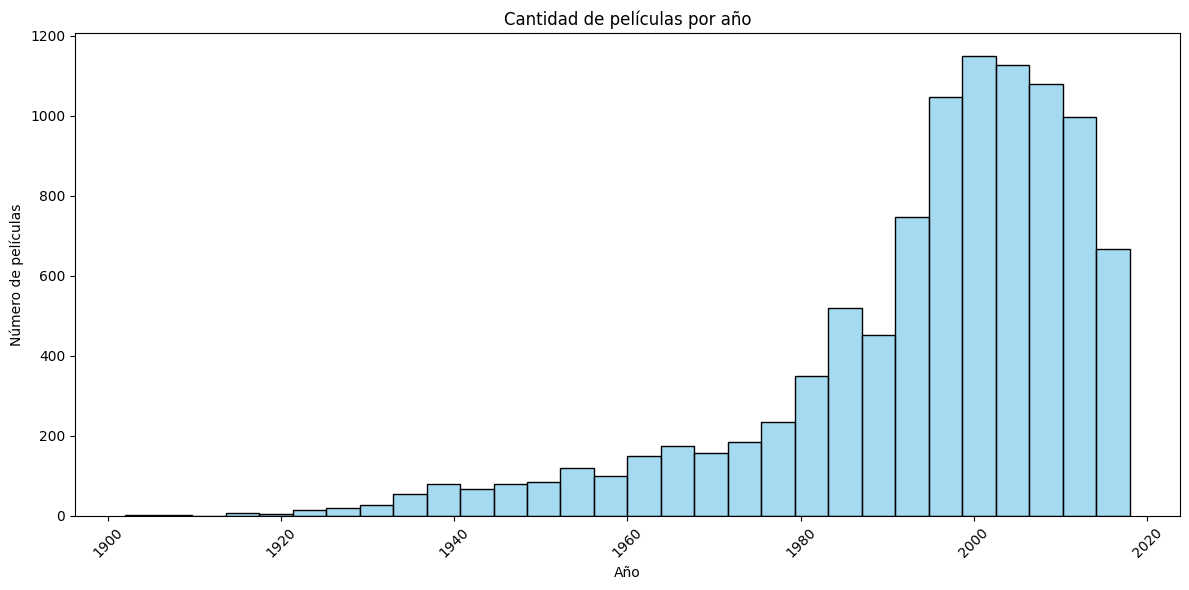

In [ ]:
db_movies_final['year'] = pd.to_numeric(db_movies_final['year'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.histplot(data=db_movies_final, x='year', bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Cantidad de películas por año')
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
'''db_movies["año"] = db_movies["title"].str.extract('(\(\d{4}\))', expand=False).str.strip('()').astype(float)
db_movies["año"] = pd.to_numeric(db_movies["año"], errors='coerce').astype('Int64')'''

In [ ]:
'''db_movies = db_movies.join(db_movies["genres"].str.get_dummies(sep="|"))
db_movies'''

,movieId,title,genres,año,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
db_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
db_ratings['fecha'] = pd.to_datetime(db_ratings['timestamp'], unit='s')  ## para cambiar el timestamp

In [ ]:
db_ratings.head()

,userId,movieId,rating,timestamp,fecha
0,1,1,4.0,964982703,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51


In [ ]:
#Contando cuántas veces un usuario dio una calificación de 5 y el promedio de calificación por usuario

pd.read_sql("""
    SELECT "userId",
        COUNT(CASE WHEN "rating" = 5 THEN 1 END) AS total_5_por_usuario,
        AVG("rating") AS promedio_user
    FROM ratings
    GROUP BY "userId"
    order by promedio_user desc
""", con)

,userId,total_5_por_usuario,promedio_user
0,53,20,5.000000
1,251,21,4.869565
2,515,21,4.846154
3,25,20,4.807692
4,30,27,4.735294
...,...,...,...
605,567,14,2.245455
606,153,5,2.217877
607,508,0,2.145833
608,139,0,2.144330


In [ ]:
# Promedio de calificaciones para cada película.

pd.read_sql("""
    SELECT "movieId", AVG("rating") AS promedio_pelicula
    FROM ratings
    GROUP BY "movieId"
    ORDER BY promedio_pelicula DESC
""", con)

,movieId,promedio_pelicula
0,187717,5.0
1,184245,5.0
2,179135,5.0
3,179133,5.0
4,176601,5.0
...,...,...
9719,4580,0.5
9720,4371,0.5
9721,4051,0.5
9722,3933,0.5


In [12]:
fn.ejecutar_sql('preprocesamientos.sql', cur)

cur.execute("select name from sqlite_master where type='table' ")
cur.fetchall()

[('ratings',),
 ('movies',),
 ('db_movies_final',),
 ('usuarios_selectos',),
 ('Pelis_selectas',),
 ('ratings_final',),
 ('movies_final',),
 ('full_ratings',)]

In [ ]:
con.close() ## Cerrar conexion